In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS as gensim_stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from gensim.models import LdaMulticore, LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## IMPOR DATA

In [ ]:
file_path = r"C:\Users\Acer\OneDrive\Pictures\Kuliah\Semester 5\Data Mining II - Laprak\data datmin ii\dataset_tripadvisor-reviews_2024-11-10_15-01-08-741.csv"
data = pd.read_csv(file_path)

data.head()

,helpfulVotes,id,lang,locationId,ownerResponse,ownerResponse/connectionToSubject,ownerResponse/id,ownerResponse/lang,ownerResponse/publishedDate,ownerResponse/responder,...,user/contributions/helpfulVotes,user/contributions/totalContributions,user/link,user/name,user/userId,user/userLocation,user/userLocation/id,user/userLocation/name,user/userLocation/shortName,user/username
0,0,979264864,en,611947,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,www.tripadvisor.com/Profile/Flyer47451,Flyer47451,DCAB9E3C8F399038CD5A2DEDFD266FA0,NaN,186411.0,"Leeds, United Kingdom",Leeds,Flyer47451
1,0,974143723,en,611947,NaN,General Manager,974387349.0,en,2024-10-18,General Manager,...,57,70,www.tripadvisor.com/Profile/JohnPaul77,JohnPaul77,ACD9E940BED41D17783CA3714155C61C,NaN,NaN,NaN,NaN,JohnPaul77
2,0,979259245,en,611947,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,www.tripadvisor.com/Profile/Companion12232565682,Companion12232565682,082988B216A701AAC4B226CE5FE4FF89,NaN,NaN,NaN,NaN,Companion12232565682
3,0,979239862,en,611947,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,www.tripadvisor.com/Profile/500nagit,Nagi T,5216FA5DF12FCB5F90A4B9BA825D4C93,NaN,NaN,NaN,NaN,500nagit
4,0,979171455,en,611947,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,www.tripadvisor.com/Profile/Klilac2000,Klilac2000,51D6FBC478DF0BA5CBA5053576C3906D,NaN,31352.0,"Sedona, Arizona",Sedona,Klilac2000


In [4]:
data.columns.tolist()



['helpfulVotes',
 'id',
 'lang',
 'locationId',
 'ownerResponse',
 'ownerResponse/connectionToSubject',
 'ownerResponse/id',
 'ownerResponse/lang',
 'ownerResponse/publishedDate',
 'ownerResponse/responder',
 'ownerResponse/text',
 'photos/0/id',
 'photos/0/image',
 'photos/0/photoSizes/0/height',
 'photos/0/photoSizes/0/url',
 'photos/0/photoSizes/0/width',
 'photos/0/photoSizes/1/height',
 'photos/0/photoSizes/1/url',
 'photos/0/photoSizes/1/width',
 'photos/0/photoSizes/2/height',
 'photos/0/photoSizes/2/url',
 'photos/0/photoSizes/2/width',
 'photos/0/photoSizes/3/height',
 'photos/0/photoSizes/3/url',
 'photos/0/photoSizes/3/width',
 'photos/0/photoSizes/4/height',
 'photos/0/photoSizes/4/url',
 'photos/0/photoSizes/4/width',
 'photos/0/photoSizes/5/height',
 'photos/0/photoSizes/5/url',
 'photos/0/photoSizes/5/width',
 'photos/0/photoSizes/6/height',
 'photos/0/photoSizes/6/url',
 'photos/0/photoSizes/6/width',
 'photos/0/photoSizes/7/height',
 'photos/0/photoSizes/7/url',
 'phot

In [ ]:
data = data[data['lang'] == 'en'][['text', 'rating', 'travelDate', 'tripType']]
data.head(20)

## VISUALISASI DATA

C:\Users\Acer\AppData\Local\Temp\ipykernel_18852\167896602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['travelDate'] = pd.to_datetime(data['travelDate'], format='%Y-%m')


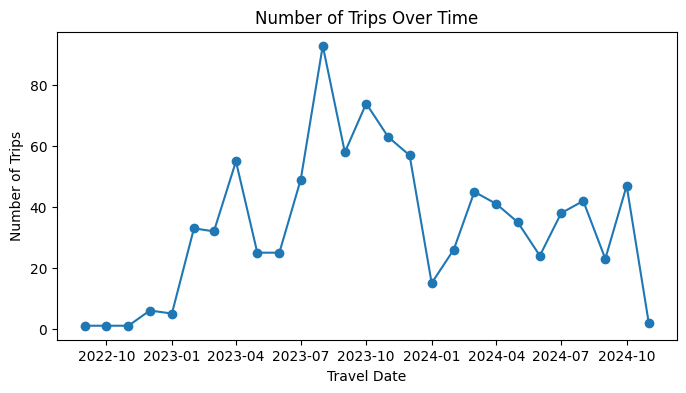

In [ ]:
data['travelDate'] = pd.to_datetime(data['travelDate'], format='%Y-%m')
travel_date_counts = data['travelDate'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(travel_date_counts.index, travel_date_counts.values, marker='o')
plt.xlabel('Travel Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Over Time')
plt.show()

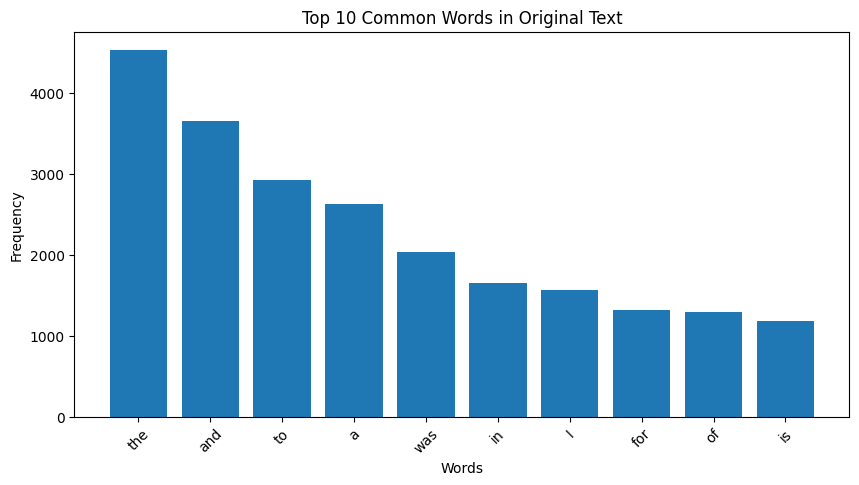

In [ ]:
top_words_text_df = pd.DataFrame(list(top_words_text.items()), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 5))
plt.bar(top_words_text_df['Word'], top_words_text_df['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Common Words in Original Text')
plt.xticks(rotation=45)
plt.show()

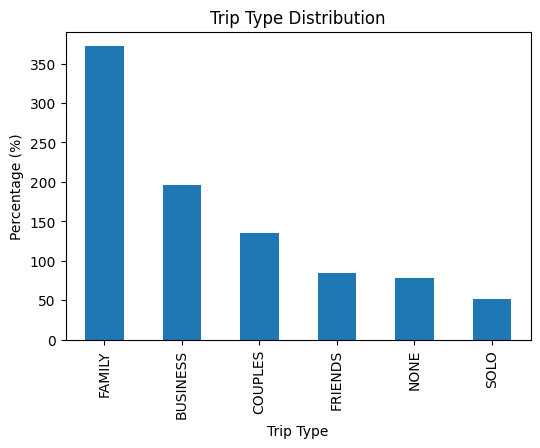

In [ ]:
plt.figure(figsize=(6, 4))
trip_type_counts.plot(kind='bar')
plt.xlabel('Trip Type')
plt.ylabel('Percentage (%)')
plt.title('Trip Type Distribution')
plt.show()

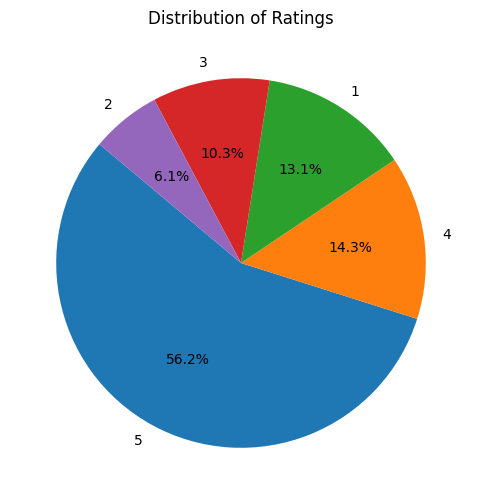

In [ ]:
plt.figure(figsize=(6, 6))
data['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Distribution of Ratings')
plt.show()

## PREPROCESSING DATA

In [ ]:
nltk_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

custom_stopwords = nltk_stopwords.union(gensim_stopwords)
additional_stopwords = {"hotel", "stay", "room", "would", "hilton", "u", "day", "night", "could", "get", "one", "like", "also", "midtown", "great"}
custom_stopwords.update(additional_stopwords)

def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]
    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)
data[['text', 'cleaned_text']].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18852\1252433603.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['text'].apply(preprocess_text)


,text,cleaned_text
0,Spent five nights here. First the pros: great ...,spent night pro location check efficient absol...
1,Have just returned from a 5 night stay at the ...,returned wife year old daughter fault definite...
2,Really enjoyable week. Hotel more than met our...,enjoyable week met requirement helpful friendl...
3,"Darryl, who took care of me at the front desk ...",darryl took care desk checked superb wellspoke...
4,I was overcharged for my room and I’m still tr...,overcharged im trying resolve customer care di...


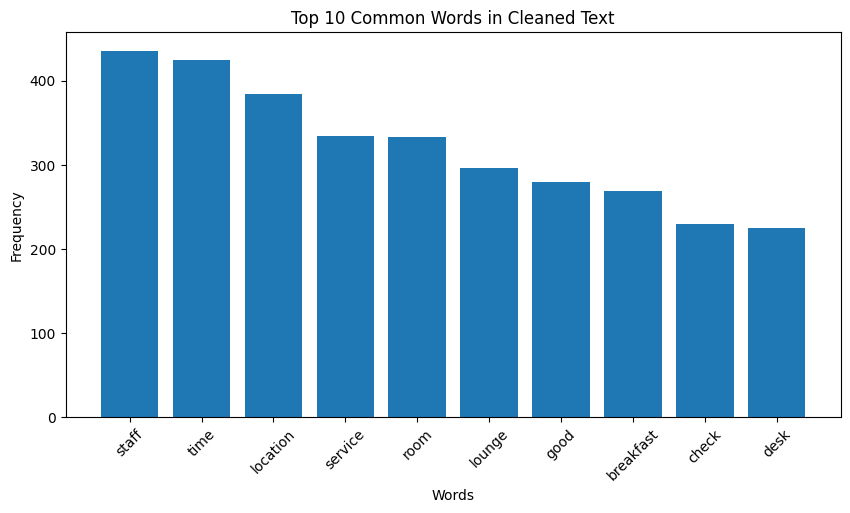

In [ ]:
def top_common_words(column, top_n=10):
    all_words = ' '.join(column).split()
    common_words = Counter(all_words).most_common(top_n)
    return dict(common_words)

top_words_cleaned_text = top_common_words(data['cleaned_text'])
top_words_cleaned_text_df = pd.DataFrame(list(top_words_cleaned_text.items()), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 5))
plt.bar(top_words_cleaned_text_df['Word'], top_words_cleaned_text_df['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Common Words in Cleaned Text')
plt.xticks(rotation=45)
plt.show()


In [ ]:
texts = [text.split() for text in data['cleaned_text']]

bigram = Phrases(texts, min_count=5, threshold=10)
trigram = Phrases(bigram[texts], threshold=10)
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)
texts_bigrams_trigrams = [trigram_phraser[bigram_phraser[text]] for text in texts]

id2word = Dictionary(texts_bigrams_trigrams)
corpus = [id2word.doc2bow(text) for text in texts_bigrams_trigrams]

print("Sample bigrams/trigrams:", texts_bigrams_trigrams[0])
print("Dictionary (id2word) sample:", list(id2word.items())[:10])
print("Corpus sample:", corpus[:2])

Sample bigrams/trigrams: ['spent', 'night', 'pro', 'location', 'check', 'efficient', 'absolutely', 'fine', 'bigger', 'expected', 'comfortable', 'linen', 'decent', 'shower', 'nice', 'toiletry', 'housekeeping_staff', 'lovely', 'con', 'tea_coffee_facility', 'enquired', 'breakfast', 'rate', 'told', 'dollar', 'plus_tax', 'thankfully', 'quality', 'diner', 'nearby', 'dollar', 'resort_fee', 'spent', 'cafebar', 'price', 'inflated', 'example', 'bottle_water', 'dollar', 'dollar', 'doesnt', 'far', 'incurred', 'delay', 'checkout', 'long_queue', 'slightly', 'disappointing', 'pay', 'dollar', 'luggage', 'stored', 'hour', 'overall', 'look', 'available', 'time']
Dictionary (id2word) sample: [(0, 'absolutely'), (1, 'available'), (2, 'bigger'), (3, 'bottle_water'), (4, 'breakfast'), (5, 'cafebar'), (6, 'check'), (7, 'checkout'), (8, 'comfortable'), (9, 'con')]
Corpus sample: [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 

## PEMODELAN LDA

Number of Topics: 2, Coherence Score: 0.2520
Number of Topics: 3, Coherence Score: 0.2758
Number of Topics: 4, Coherence Score: 0.2344
Number of Topics: 5, Coherence Score: 0.2833
Number of Topics: 6, Coherence Score: 0.2851
Number of Topics: 7, Coherence Score: 0.2636
Number of Topics: 8, Coherence Score: 0.2942
Number of Topics: 9, Coherence Score: 0.2649
Number of Topics: 10, Coherence Score: 0.2909
Number of Topics: 11, Coherence Score: 0.2651
Number of Topics: 12, Coherence Score: 0.2660
Number of Topics: 13, Coherence Score: 0.2501
Number of Topics: 14, Coherence Score: 0.2934
Number of Topics: 15, Coherence Score: 0.2662


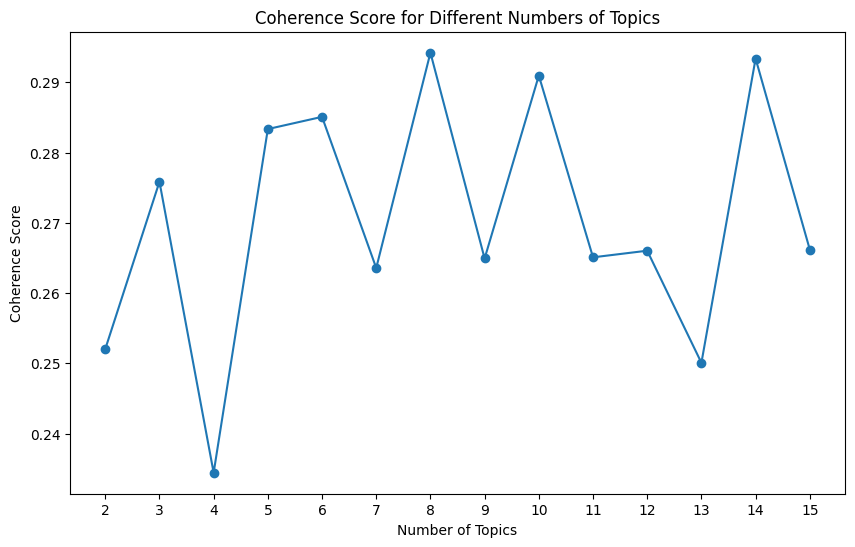

In [ ]:
topic_range = range(2, 16)
coherence_scores = []

for num_topics in topic_range:
    lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=20, iterations=300, workers=4)
    
    coherence_model = CoherenceModel(model=lda_model, texts=texts_bigrams_trigrams, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    
    print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Numbers of Topics")
plt.xticks(topic_range)
plt.show()


In [ ]:
alpha_values = [0.01, 0.1, 0.5, 0.8, 1.0]
beta_values = [0.01, 0.1, 0.5, 0.8, 1.0]

coherence_scores = {}

for alpha in alpha_values:
    for beta in beta_values:
        lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=8, 
                                 passes=20, iterations=300, workers=4, 
                                 alpha=alpha, eta=beta)
        coherence_model = CoherenceModel(model=lda_model, texts=texts_bigrams_trigrams, 
                                         dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores[(alpha, beta)] = coherence_score
        print(f'Alpha: {alpha}, Beta: {beta}, Coherence Score: {coherence_score:.4f}')

best_alpha, best_beta = max(coherence_scores, key=coherence_scores.get)
print(f"\nBest Alpha: {best_alpha}, Best Beta: {best_beta}, Best Coherence Score: {coherence_scores[(best_alpha, best_beta)]:.4f}")

Alpha: 0.01, Beta: 0.01, Coherence Score: 0.2565
Alpha: 0.01, Beta: 0.1, Coherence Score: 0.2841
Alpha: 0.01, Beta: 0.5, Coherence Score: 0.2470
Alpha: 0.01, Beta: 0.8, Coherence Score: 0.2769
Alpha: 0.01, Beta: 1.0, Coherence Score: 0.3550
Alpha: 0.1, Beta: 0.01, Coherence Score: 0.2930
Alpha: 0.1, Beta: 0.1, Coherence Score: 0.2479
Alpha: 0.1, Beta: 0.5, Coherence Score: 0.3025
Alpha: 0.1, Beta: 0.8, Coherence Score: 0.3274
Alpha: 0.1, Beta: 1.0, Coherence Score: 0.3924
Alpha: 0.5, Beta: 0.01, Coherence Score: 0.2871
Alpha: 0.5, Beta: 0.1, Coherence Score: 0.2817
Alpha: 0.5, Beta: 0.5, Coherence Score: 0.2981
Alpha: 0.5, Beta: 0.8, Coherence Score: 0.3125
Alpha: 0.5, Beta: 1.0, Coherence Score: 0.3890
Alpha: 0.8, Beta: 0.01, Coherence Score: 0.3079
Alpha: 0.8, Beta: 0.1, Coherence Score: 0.2775
Alpha: 0.8, Beta: 0.5, Coherence Score: 0.2989
Alpha: 0.8, Beta: 0.8, Coherence Score: 0.3546
Alpha: 0.8, Beta: 1.0, Coherence Score: 0.4625
Alpha: 1.0, Beta: 0.01, Coherence Score: 0.2846
Alp

In [13]:
fix_lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=8, 
                                 passes=20, iterations=300, workers=4, 
                                 alpha=best_alpha, eta=best_beta)

In [ ]:
print("Top words for each LDA topic:")
for i, topic in fix_lda_model.show_topics(num_topics=8, num_words=10, formatted=False):
    words_str = ", ".join([word for word, _ in topic])
    print(f"Topic {i+1}: {words_str}")


Top words for each LDA topic:
Topic 1: hopefully, thanksgiving, jason, looking_forward, dedication, tickled, santa, mailbox, welcomed, letter
Topic 2: headboard, stapler, carpet, worst_experience, temperature, honor_member, realized, maintenance, lighting, outrageous
Topic 3: time, staff, location, room, good, service, breakfast, check, desk, nyc
Topic 4: elevator, door, manager, hour, line, experience, minute, desk, told, staff
Topic 5: hearing, aid, charger, george, anytime, unparalleled, extraordinary, text, series, ardmore
Topic 6: brand, babybed, truly, hospitality, issue, wifi, manager, desk, asset, colleague
Topic 7: wife, driver, car, cab, granddaughter, told, moved, join, wedding, held
Topic 8: manager, clearly, dust, vent, nasty, carpet, dirty, leave, downgraded, literally


In [ ]:
topic_names = {
    0: "Holiday Greetings and Special Events",
    1: "Room Issues and Maintenance Complaints",
    2: "General Guest Experience and Amenities",
    3: "Waiting Times and Staff Responsiveness",
    4: "Personalized Service and Communication",
    5: "Hospitality and Staff Professionalism",
    6: "Family Visits and Special Occasions",
    7: "Cleanliness Issues and Room Downgrades"
}

print("Topics with Custom Names and Top Words:")
for topic_id, words in fix_lda_model.show_topics(num_topics=8, num_words=10, formatted=False):
    topic_name = topic_names.get(topic_id, f"Topic {topic_id + 1}")
    words_str = ", ".join([word for word, _ in words])
    print(f"{topic_name}:\n  - Top Words: {words_str}\n")


Topics with Custom Names and Top Words:
Holiday Greetings and Special Events:
  - Top Words: hopefully, thanksgiving, jason, looking_forward, dedication, tickled, santa, mailbox, welcomed, letter

Room Issues and Maintenance Complaints:
  - Top Words: headboard, stapler, carpet, worst_experience, temperature, honor_member, realized, maintenance, lighting, outrageous

General Guest Experience and Amenities:
  - Top Words: time, staff, location, room, good, service, breakfast, check, desk, nyc

Waiting Times and Staff Responsiveness:
  - Top Words: elevator, door, manager, hour, line, experience, minute, desk, told, staff

Personalized Service and Communication:
  - Top Words: hearing, aid, charger, george, anytime, unparalleled, extraordinary, text, series, ardmore

Hospitality and Staff Professionalism:
  - Top Words: brand, babybed, truly, hospitality, issue, wifi, manager, desk, asset, colleague

Family Visits and Special Occasions:
  - Top Words: wife, driver, car, cab, granddaughte

In [ ]:
topic_threshold = 0.1  
topics = []

for bow in corpus:
    topic_distribution = fix_lda_model.get_document_topics(bow, minimum_probability=0)
    significant_topics = [(topic_id, topic_names.get(topic_id, f"Topic {topic_id}"), prob) 
                          for topic_id, prob in topic_distribution if prob >= topic_threshold]
        if significant_topics:
        best_topic = max(significant_topics, key=lambda x: x[2])  
        topics.append((best_topic[0], best_topic[1]))  
    else:
        topics.append((None, None)) 

topics_df = pd.DataFrame(topics, columns=["topic_id", "topic_name"])
data_with_topics = pd.concat([data, topics_df], axis=1)
data_with_topics.head(10)


,text,rating,travelDate,tripType,cleaned_text,topic_id,topic_name
0,Spent five nights here. First the pros: great ...,4.0,2024-11,FRIENDS,spent night pro location check efficient absol...,2.0,General Guest Experience and Amenities
1,Have just returned from a 5 night stay at the ...,5.0,2024-10,FAMILY,returned wife year old daughter fault definite...,2.0,General Guest Experience and Amenities
2,Really enjoyable week. Hotel more than met our...,5.0,2024-10,FAMILY,enjoyable week met requirement helpful friendl...,2.0,General Guest Experience and Amenities
3,"Darryl, who took care of me at the front desk ...",5.0,2024-11,BUSINESS,darryl took care desk checked superb wellspoke...,2.0,General Guest Experience and Amenities
4,I was overcharged for my room and I’m still tr...,1.0,2024-10,FAMILY,overcharged im trying resolve customer care di...,2.0,General Guest Experience and Amenities
5,We stayed here for 4 nights. \nPros : The loca...,3.0,2024-10,FAMILY,stayed night pro location upper fantastic majo...,2.0,General Guest Experience and Amenities
6,The check in experience is the worst I have ev...,2.0,2024-10,FAMILY,check experience worst landed pm nd october ch...,2.0,General Guest Experience and Amenities
8,"Perfect spot, we really enjoyed our stay here....",5.0,2024-07,FAMILY,perfect spot enjoyed walking distance time squ...,2.0,General Guest Experience and Amenities
9,The best thing about this hotel is the locatio...,1.0,2024-10,FAMILY,best thing location thats polite member staff ...,3.0,Waiting Times and Staff Responsiveness
10,I had the most terrible experience with the fr...,1.0,2024-10,BUSINESS,terrible experience desk staff assistant direc...,2.0,General Guest Experience and Amenities


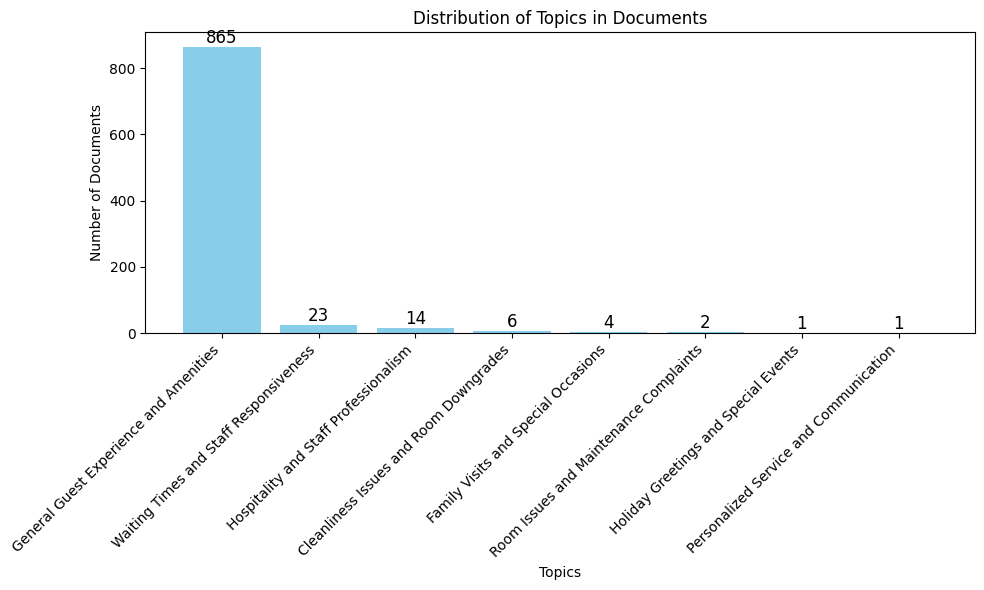

In [ ]:
if 'topic_name' in data_with_topics.columns:
    topic_counts = data_with_topics['topic_name'].value_counts()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(topic_counts.index, topic_counts.values, color='skyblue')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)


    plt.xlabel("Topics")
    plt.ylabel("Number of Documents")
    plt.title("Distribution of Topics in Documents")
    plt.xticks(rotation=45, ha="right")  
    plt.tight_layout()

    plt.show()
else:
    print("The 'topic_name' column is not present in the DataFrame.")


In [191]:
data_with_topics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 915
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          916 non-null    object 
 1   rating        916 non-null    float64
 2   travelDate    916 non-null    object 
 3   tripType      916 non-null    object 
 4   cleaned_text  916 non-null    object 
 5   topic_id      916 non-null    float64
 6   topic_name    916 non-null    object 
dtypes: float64(2), object(5)
memory usage: 61.9+ KB


In [ ]:
data_with_topics = data_with_topics.dropna()

print("Number of rows before cleaning:", data_with_topics.shape[0])
print("Number of rows after cleaning:", data_with_topics_cleaned.shape[0])

data_with_topics.tail()


Number of rows before cleaning: 842
Number of rows after cleaning: 842


,text,rating,travelDate,tripType,cleaned_text,topic_id,topic_name
910,Had a terrible experience here. I would've gi...,1.0,2023-03,COUPLES,terrible experience wouldve given star paid we...,2.0,General Guest Experience and Amenities
911,"My husband and I, both Hilton Honors Members a...",2.0,2023-04,NONE,husband honor member grand vacation owner took...,2.0,General Guest Experience and Amenities
912,9 times out of 10 when I come to the big apple...,5.0,2023-04,SOLO,time come big apple city sleep usually propert...,2.0,General Guest Experience and Amenities
913,Hilton Midtown is amazing and in a prime locat...,5.0,2023-04,NONE,amazing prime location staff welcoming helpful...,2.0,General Guest Experience and Amenities
914,We had a great stay at the NY Hilton Midtown. ...,5.0,2023-04,NONE,ny able check early room right cleaning staff ...,2.0,General Guest Experience and Amenities


In [ ]:
data_with_topics['topic_name'] = data_with_topics['topic_id'].map(topic_names)
topic_counts = data_with_topics['topic_name'].value_counts()
low_frequency_topics = topic_counts[topic_counts < 10].index
data_with_topics['grouped_topic'] = data_with_topics['topic_name'].apply(
    lambda x: "Other" if x in low_frequency_topics else x
)

grouped_topic_counts = data_with_topics['grouped_topic'].value_counts()
print("Updated Topic Distribution (Grouped):")
print(grouped_topic_counts)

Updated Topic Distribution (Grouped):
grouped_topic
General Guest Experience and Amenities    795
Waiting Times and Staff Responsiveness     22
Other                                      14
Hospitality and Staff Professionalism      11
Name: count, dtype: int64


C:\Users\Acer\AppData\Local\Temp\ipykernel_18852\1221185097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_topics['topic_name'] = data_with_topics['topic_id'].map(topic_names)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18852\1221185097.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_topics['grouped_topic'] = data_with_topics['topic_name'].apply(


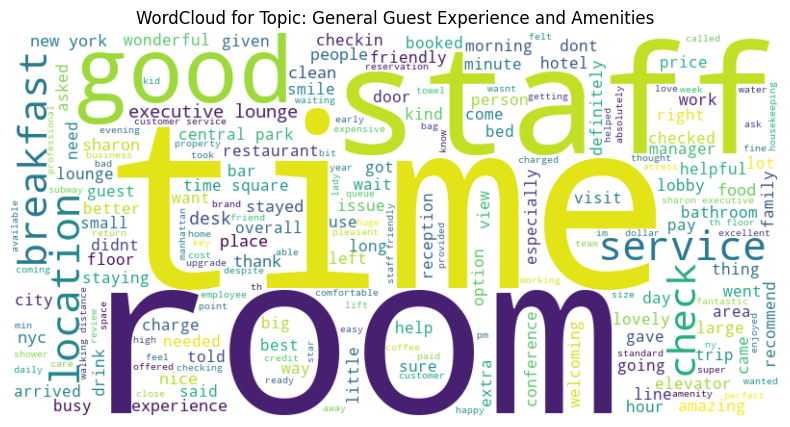

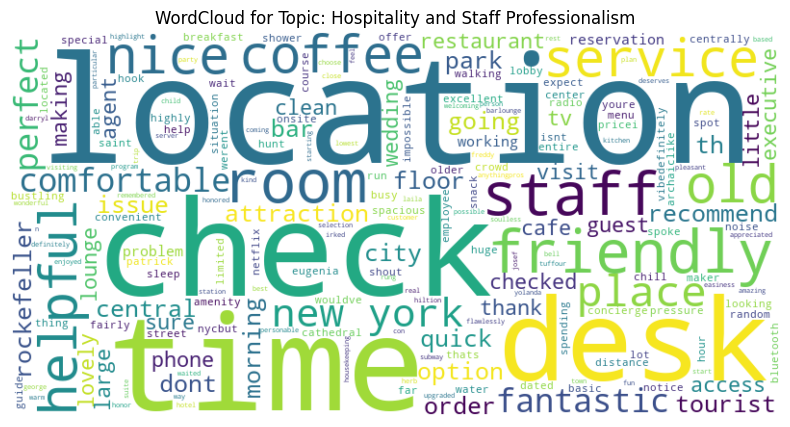

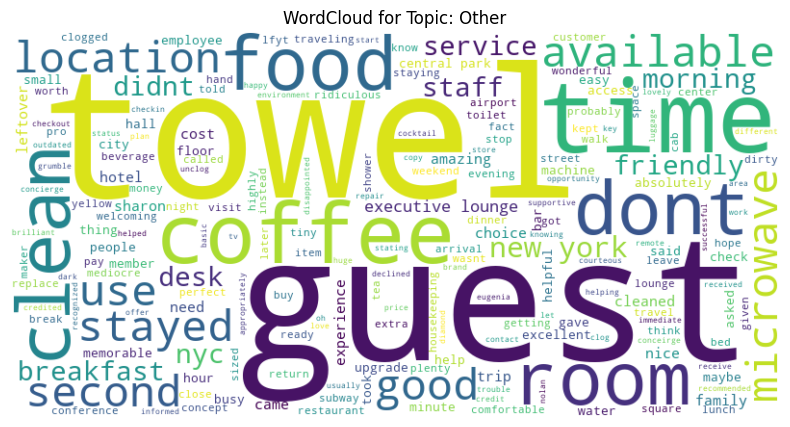

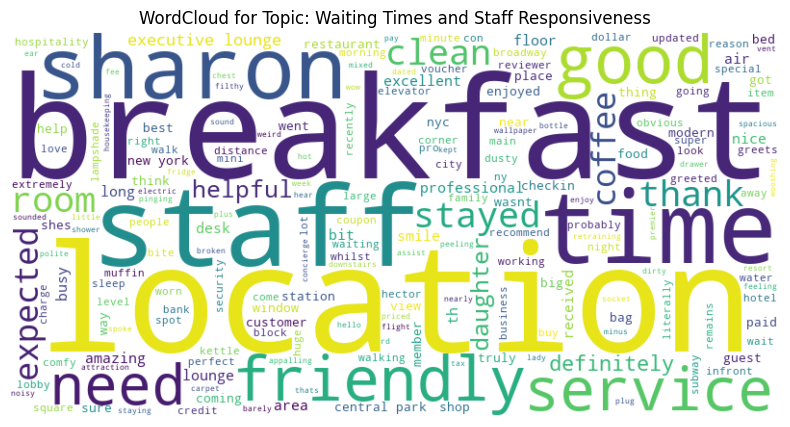

In [253]:
grouped_topic_texts = data_with_topics.groupby('grouped_topic')['cleaned_text'].apply(' '.join)

for topic, text in grouped_topic_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Topic: {topic}")
    plt.show()

### KLASIFIKASI LDA

In [267]:
X = data_with_topics['cleaned_text']
y = data_with_topics['grouped_topic']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping label asli ke nilai numerik:")
for label, value in label_mapping.items():
    print(f"{label}: {value}")
tfidf_vectorizer = TfidfVectorizer()  
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("Distribusi kelas pada y_train sebelum SMOTE:")
print(Counter(y_train))

Mapping label asli ke nilai numerik:
General Guest Experience and Amenities: 0
Hospitality and Staff Professionalism: 1
Other: 2
Waiting Times and Staff Responsiveness: 3
Distribusi kelas pada y_train sebelum SMOTE:
Counter({0: 635, 3: 18, 2: 11, 1: 9})


In [268]:
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train.toarray(), y_train)
print("Distribusi kelas pada y_train setelah SMOTE:")
print(Counter(y_train_resampled))


Distribusi kelas pada y_train setelah SMOTE:
Counter({0: 635, 3: 635, 2: 11, 1: 9})


In [269]:
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_classifier.predict(X_test.toarray())  

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       160
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4

    accuracy                           0.95       169
   macro avg       0.24      0.25      0.24       169
weighted avg       0.90      0.95      0.92       169

Random Forest Accuracy: 0.9467455621301775


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

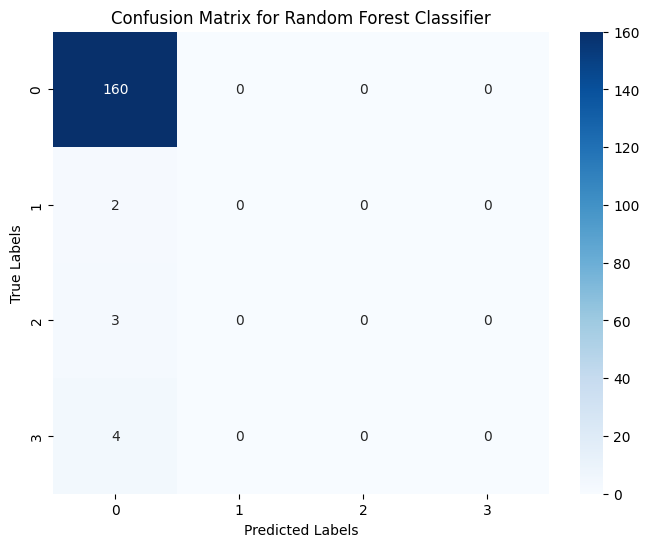

In [270]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [271]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_classifier.predict(X_test.toarray())  

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       160
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4

    accuracy                           0.94       169
   macro avg       0.24      0.25      0.24       169
weighted avg       0.90      0.94      0.92       169

XGBoost Accuracy: 0.9408284023668639


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

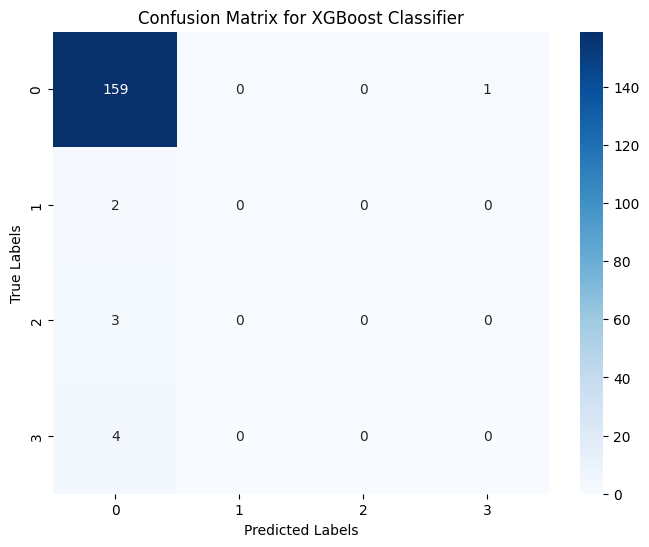

In [262]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

## SENTIMENT ANALYSIS

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data_with_topics['sentiment_polarity'] = data_with_topics['cleaned_text'].apply(get_sentiment)
data_with_topics.head()


C:\Users\Acer\AppData\Local\Temp\ipykernel_18852\1479090554.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_topics['sentiment_polarity'] = data_with_topics['cleaned_text'].apply(get_sentiment)


,text,rating,travelDate,tripType,cleaned_text,topic_id,topic_name,grouped_topic,sentiment_polarity,sentiment_category
0,Spent five nights here. First the pros: great ...,4.0,2024-11,FRIENDS,spent night pro location check efficient absol...,2.0,General Guest Experience and Amenities,General Guest Experience and Amenities,0.116667,Neutral
1,Have just returned from a 5 night stay at the ...,5.0,2024-10,FAMILY,returned wife year old daughter fault definite...,2.0,General Guest Experience and Amenities,General Guest Experience and Amenities,0.261631,Positive
2,Really enjoyable week. Hotel more than met our...,5.0,2024-10,FAMILY,enjoyable week met requirement helpful friendl...,2.0,General Guest Experience and Amenities,General Guest Experience and Amenities,0.331863,Positive
3,"Darryl, who took care of me at the front desk ...",5.0,2024-11,BUSINESS,darryl took care desk checked superb wellspoke...,2.0,General Guest Experience and Amenities,General Guest Experience and Amenities,0.269444,Positive
4,I was overcharged for my room and I’m still tr...,1.0,2024-10,FAMILY,overcharged im trying resolve customer care di...,2.0,General Guest Experience and Amenities,General Guest Experience and Amenities,0.187500,Neutral


In [244]:
def categorize_sentiment(polarity):
    if polarity < -0.2:
        return 'Negative'
    elif polarity > 0.2:
        return 'Positive'
    else:
        return 'Neutral'

data_with_topics['sentiment_category'] = data_with_topics['sentiment_polarity'].apply(categorize_sentiment)

sentiment_category_counts = data_with_topics['sentiment_category'].value_counts()
sentiment_category_counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_18852\3184376618.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_topics['sentiment_category'] = data_with_topics['sentiment_polarity'].apply(categorize_sentiment)


sentiment_category
Positive    516
Neutral     289
Negative     37
Name: count, dtype: int64

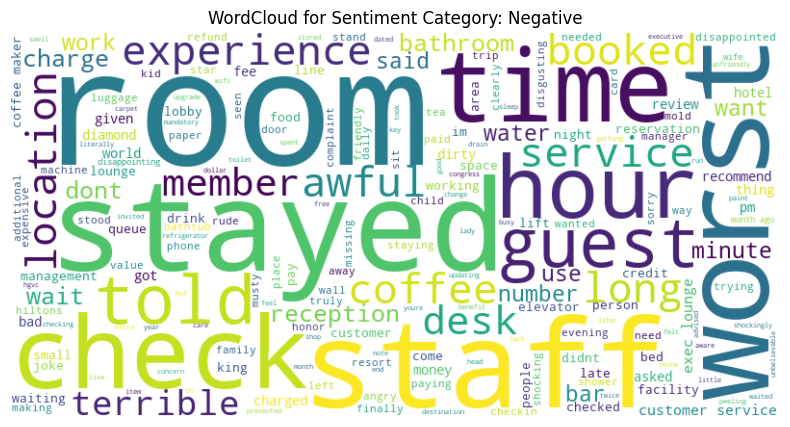

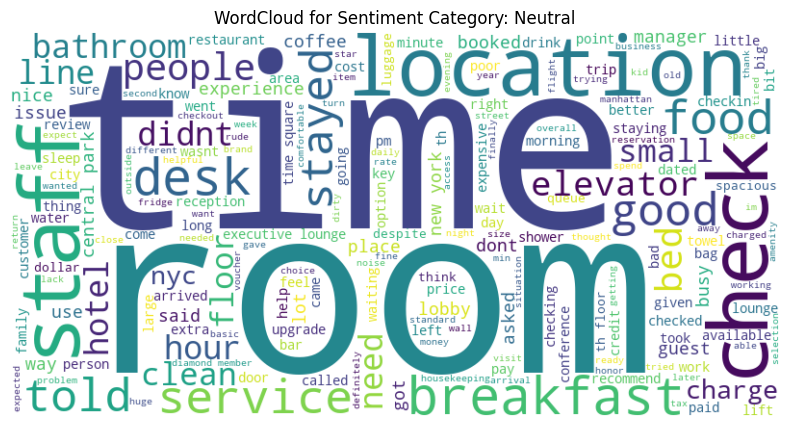

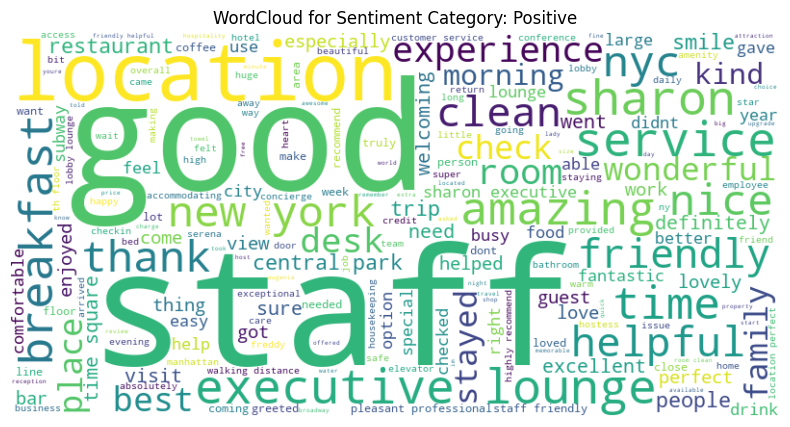

In [ ]:
sentiment_texts = data_with_topics.groupby('sentiment_category')['cleaned_text'].apply(' '.join)

for sentiment, text in sentiment_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Sentiment Category: {sentiment}")
    plt.show()

### PEMODELAN SENTIMENT ANALYSIS

In [272]:
X = data_with_topics['cleaned_text']
y = data_with_topics['sentiment_category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping label asli ke nilai numerik:")
for label, value in label_mapping.items():
    print(f"{label}: {value}")
tfidf_vectorizer = TfidfVectorizer()  
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("Distribusi kelas pada y_train sebelum SMOTE:")
print(Counter(y_train))

Mapping label asli ke nilai numerik:
Negative: 0
Neutral: 1
Positive: 2
Distribusi kelas pada y_train sebelum SMOTE:
Counter({2: 412, 1: 231, 0: 30})


In [273]:
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train.toarray(), y_train)
print("Distribusi kelas pada y_train setelah SMOTE:")
print(Counter(y_train_resampled))

Distribusi kelas pada y_train setelah SMOTE:
Counter({1: 412, 2: 412, 0: 412})


In [274]:
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_classifier.predict(X_test.toarray())  

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.69      0.62      0.65        58
           2       0.79      0.89      0.84       104

    accuracy                           0.76       169
   macro avg       0.50      0.50      0.50       169
weighted avg       0.73      0.76      0.74       169

Random Forest Accuracy: 0.7633136094674556


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

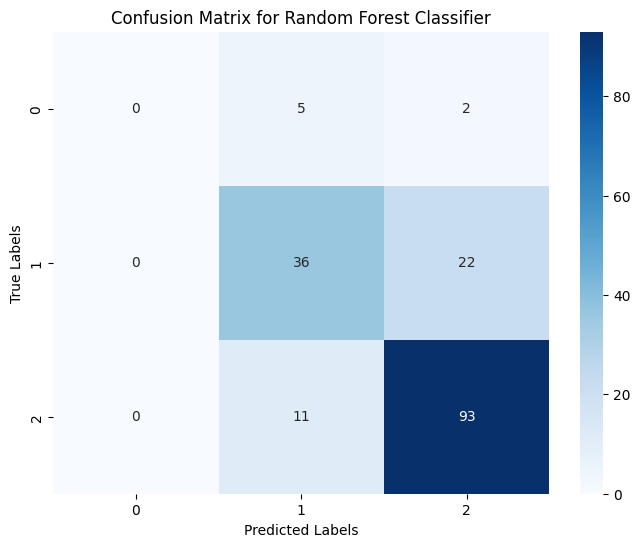

In [275]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [276]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_classifier.predict(X_test.toarray())  

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.64      0.67      0.66        58
           2       0.86      0.86      0.86       104

    accuracy                           0.76       169
   macro avg       0.50      0.51      0.50       169
weighted avg       0.75      0.76      0.75       169

XGBoost Accuracy: 0.757396449704142


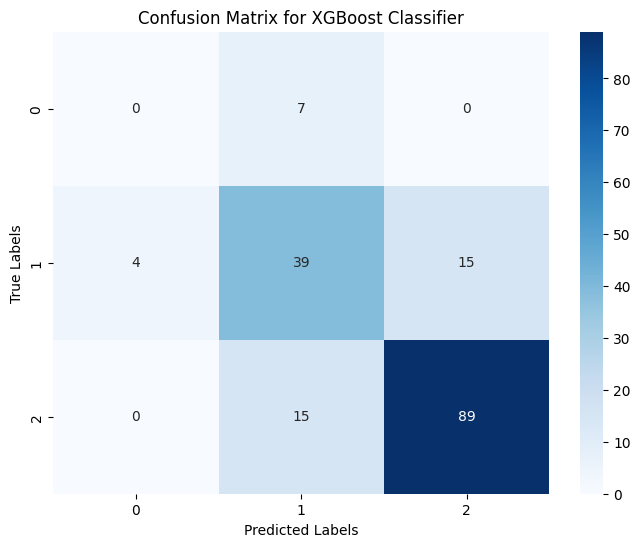

In [277]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()